In [1]:
#!pip install scipy,seaborn
import seaborn as sns
from scipy.stats import kstest

import pandas as pd
import numpy as np

#!pip install -U plotly
pd.options.plotting.backend = "plotly"

#!pip3 install nltk
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from scipy.stats import chi2_contingency

import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

#!pip3 install openpyxl
import openpyxl as px
from statsmodels.stats.weightstats import ztest



### 0.1. Read Dataset ( N = 114)

In [2]:
df = pd.read_excel('all_gpt_human_only_text.xlsx')

### 1.1. Preprocess and Tag

Get rid of extra white spaces

In [3]:
def strip(dataframe):
    return [s.strip() for s in dataframe]

df= df.apply(strip)

In [4]:
#tokenize it, and tag

def create_tokenized(text):
    tokenized = word_tokenize(text)
    'tag the tokens'
    tagged = nltk.pos_tag(tokenized)
    return tagged

In [5]:
## Filter and get words as tokens
for column in df.columns:
    df[f'tokenized_{column}'] = df[column].apply(lambda x: create_tokenized(x))

In [6]:
# Lower the words !!!!!!!!!!!!!!!!!!!!!!!!!!!

story_lower = []
for i in df['tokenized_STORY']:
    for y in i:
        word= y[0].lower()
        story_lower.append(word)
        

## 2. Get Most Common Adverbs

### 2.1. Find Common Adverbs 

Store them into list and dict

In [161]:
def common_adverbs(dataset):
    adverbs = []
    # for 116 stories
    for i in range(len(dataset)):
        # get every token for the length of tokens in story i
        for y in range(len(dataset.iloc[i])):
            # get the second part (pos-tag), if it is adverb:
            if (dataset.iloc[i][y][1]) == ('RB'or 'RBR'or 'WBR'):
                #print('yes',i, df.tokenized_STORY.iloc[i][y])
                adverbs.append(dataset.iloc[i][y][0])
            else:
                pass
    story_adv = dict(Counter(adverbs))
    new_dict = {}
    for key, value in story_adv.items():
        key_lower = key.lower()
        if key_lower in new_dict:
            new_dict[key_lower] += value
        else:
            new_dict[key_lower] = value
        #print(sorted_story_adv[:20])
    sorted_story_adv = sorted(new_dict.items(), key = lambda x:x[1], reverse = True)
    #print(sorted_story_adv[:20])
    return(sorted_story_adv[:20])

In [162]:
#Apply this function to all stories
story_common_adverbs = common_adverbs(df.tokenized_STORY)

Retell_1_common_adverbs = common_adverbs(df.tokenized_Retell_1)
Retell_2_common_adverbs = common_adverbs(df.tokenized_Retell_2)
Retell_3_common_adverbs = common_adverbs(df.tokenized_Retell_3)

GPT_R1_common_adverbs = common_adverbs(df.tokenized_GPT_R1)
GPT_R2_common_adverbs = common_adverbs(df.tokenized_GPT_R2)
GPT_R3_common_adverbs = common_adverbs(df.tokenized_GPT_R3)


### 2.1.2. Calculate Common Adverbs Overall 

Change data type to long

In [163]:
df_short = df[['tokenized_STORY','tokenized_GPT_R1', 'tokenized_GPT_R2',
       'tokenized_GPT_R3', 'tokenized_Retell_1', 'tokenized_Retell_2',
       'tokenized_Retell_3']]
df_short = df_short.reset_index()


In [164]:

df_short_human = pd.melt(df_short, id_vars='index', value_vars=['tokenized_Retell_1', 'tokenized_Retell_2',
       'tokenized_Retell_3'])
df_short_gpt = pd.melt(df_short, id_vars='index', value_vars=['tokenized_GPT_R1', 'tokenized_GPT_R2',
       'tokenized_GPT_R3', ])


In [165]:
df_short_human.value

0      [(A, DT), (high, JJ), (school, NN), (teacher, ...
1      [(A, DT), (woman, NN), (named, VBN), (Abigail,...
2      [(Jennifer, RB), (wanted, VBD), (to, TO), (go,...
3      [(Jeff, NNP), (had, VBD), (a, DT), (history, N...
4      [(A, DT), (couple, NN), (were, VBD), (trying, ...
                             ...                        
343    [(A, DT), (son, NN), (found, VBD), (out, IN), ...
344    [(John, NNP), (,, ,), (a, DT), (firefighter, N...
345    [(A, DT), (boy, NN), (wanted, VBD), (a, DT), (...
346    [(A, DT), (squirrel, NN), (jumped, NN), (in, I...
347    [(A, DT), (troll, NN), (was, VBD), (lonely, RB...
Name: value, Length: 348, dtype: object

In [166]:
all_human_common_adverbs = common_adverbs(df_short_human.value)
all_gpt_common_adverbs = common_adverbs(df_short_gpt.value)



### Overall Top 20

In [167]:
all_gpt_common_adverbs

[("n't", 38),
 ('not', 35),
 ('eventually', 29),
 ('away', 27),
 ('always', 21),
 ('still', 19),
 ('alone', 19),
 ('however', 17),
 ('later', 15),
 ('together', 15),
 ('back', 14),
 ('then', 14),
 ('now', 13),
 ('finally', 12),
 ('only', 12),
 ('too', 11),
 ('never', 11),
 ('just', 10),
 ('even', 8),
 ('recently', 8)]

In [168]:
all_human_common_adverbs

[("n't", 118),
 ('not', 83),
 ('very', 69),
 ('then', 55),
 ('so', 45),
 ('just', 33),
 ('even', 32),
 ('eventually', 30),
 ('now', 27),
 ('together', 27),
 ('well', 26),
 ('really', 25),
 ('always', 24),
 ('there', 20),
 ('also', 20),
 ('once', 20),
 ('back', 19),
 ('away', 18),
 ('never', 18),
 ('up', 17)]

### Each Gen Top 20

In [169]:
GPT_R1_common_adverbs

[("n't", 19),
 ('not', 12),
 ('always', 12),
 ('away', 10),
 ('eventually', 10),
 ('however', 8),
 ('then', 8),
 ('finally', 7),
 ('alone', 7),
 ('back', 6),
 ('still', 6),
 ('together', 5),
 ('up', 5),
 ('recently', 5),
 ('now', 5),
 ('too', 5),
 ('just', 5),
 ('later', 4),
 ('well', 4),
 ('only', 4)]

In [170]:
Retell_1_common_adverbs

[("n't", 48),
 ('not', 36),
 ('very', 28),
 ('then', 26),
 ('so', 20),
 ('just', 15),
 ('always', 15),
 ('now', 14),
 ('even', 13),
 ('well', 11),
 ('there', 10),
 ('also', 10),
 ('never', 10),
 ('really', 10),
 ('back', 9),
 ('away', 9),
 ('too', 9),
 ('once', 8),
 ('up', 8),
 ('eventually', 8)]

In [171]:
Retell_2_common_adverbs

[("n't", 42),
 ('not', 23),
 ('very', 21),
 ('then', 15),
 ('so', 14),
 ('eventually', 13),
 ('just', 11),
 ('even', 11),
 ('together', 9),
 ('well', 9),
 ('again', 8),
 ('soon', 7),
 ('there', 7),
 ('once', 7),
 ('now', 7),
 ('still', 7),
 ('up', 6),
 ('too', 5),
 ('finally', 5),
 ('as', 5)]

In [172]:
GPT_R2_common_adverbs


[('not', 14),
 ('away', 11),
 ("n't", 10),
 ('eventually', 9),
 ('still', 7),
 ('later', 6),
 ('always', 6),
 ('however', 6),
 ('alone', 6),
 ('back', 5),
 ('together', 4),
 ('now', 4),
 ('even', 4),
 ('then', 4),
 ('only', 4),
 ('never', 4),
 ('too', 3),
 ('often', 3),
 ('unexpectedly', 2),
 ('recently', 2)]

In [47]:
Retell_3_common_adverbs

[("n't", 28),
 ('not', 24),
 ('very', 20),
 ('then', 14),
 ('together', 13),
 ('so', 11),
 ('really', 10),
 ('eventually', 9),
 ('even', 8),
 ('also', 7),
 ('just', 7),
 ('back', 6),
 ('now', 6),
 ('well', 6),
 ('however', 5),
 ('once', 5),
 ('always', 5),
 ('away', 5),
 ('actually', 4),
 ('lonely', 4)]

In [51]:
GPT_R3_common_adverbs


[('eventually', 10),
 ('not', 9),
 ("n't", 9),
 ('together', 6),
 ('still', 6),
 ('away', 6),
 ('alone', 6),
 ('later', 5),
 ('now', 4),
 ('only', 4),
 ('never', 4),
 ('however', 3),
 ('too', 3),
 ('finally', 3),
 ('just', 3),
 ('back', 3),
 ('always', 3),
 ('friendly', 2),
 ('even', 2),
 ('especially', 2)]

## 3. Visualize The Common Adverbs

### 3.1. First Generation

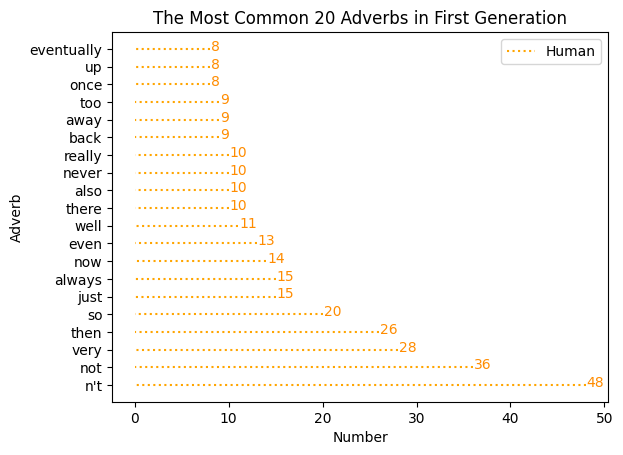

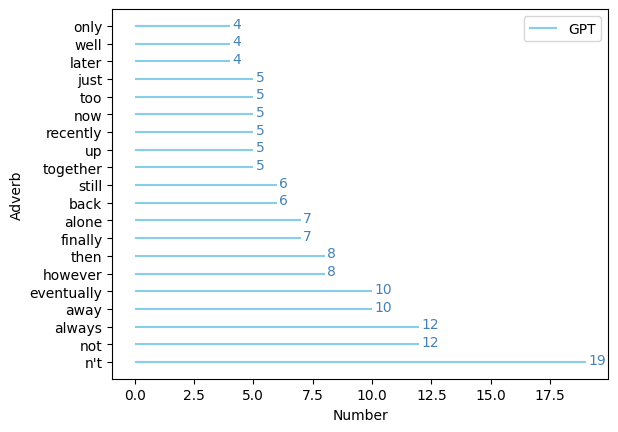

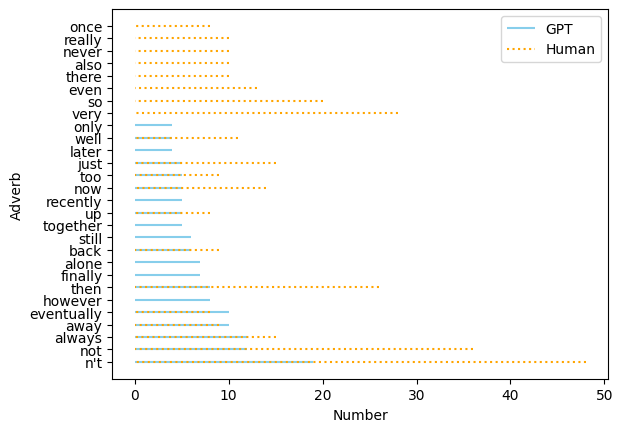

In [52]:
# Get values from GPT and Human lists 
names = [tup[0] for tup in GPT_R1_common_adverbs]
values = [tup[1] for tup in GPT_R1_common_adverbs]


names_r = [tup[0] for tup in Retell_1_common_adverbs]
values_r= [tup[1] for tup in Retell_1_common_adverbs]



# Human Data
plt.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')
plt.title("The Most Common 20 Adverbs in First Generation", loc='center')

for i, v in enumerate(values_r):
    plt.text(v + 0.1, i - 0.1, str(v), color='darkorange')
 

# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


# GPT Data
plt.hlines(names,values,xmax=0, color='skyblue', label='GPT')

for i, v in enumerate(values):
    plt.text(v + 0.1, i - 0.1, str(v), color='steelblue')

 
 
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


fig, ax = plt.subplots()

# The horizontal plot is made using the hline function
ax.hlines(names,values,xmax=0, color='skyblue', label='GPT')
ax.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')

    
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()

### 3.2. Second Generation

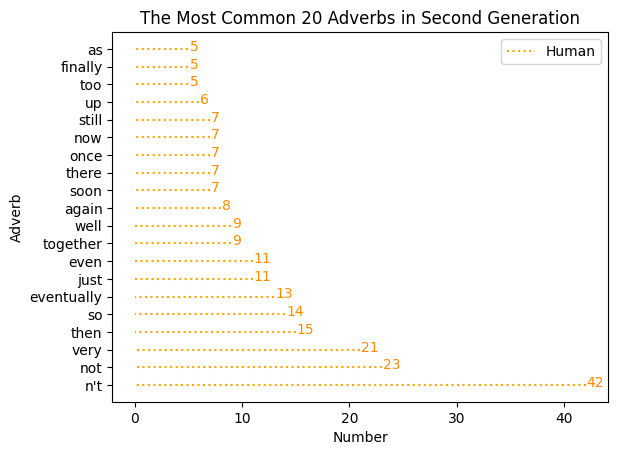

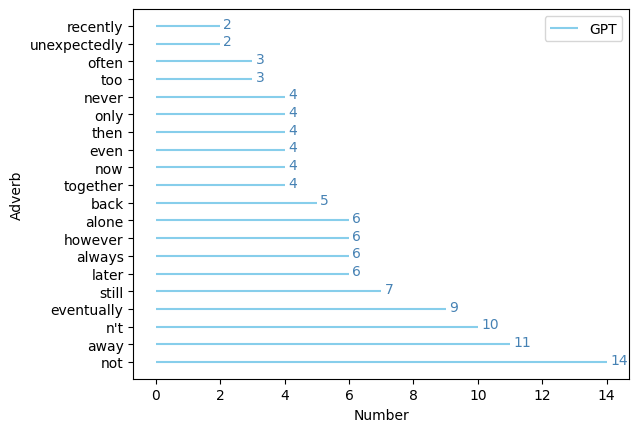

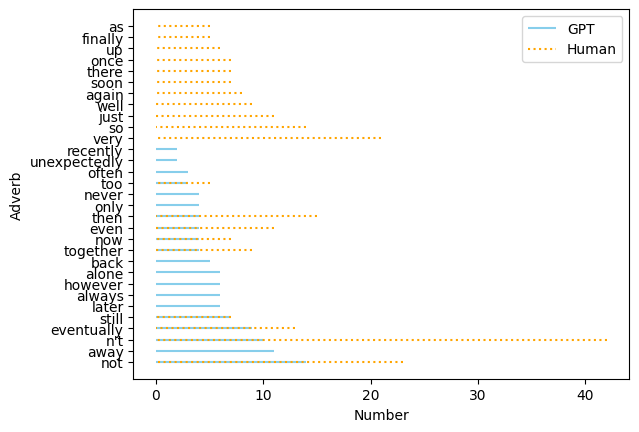

In [53]:
# Get values from GPT and Human lists 
names = [tup[0] for tup in GPT_R2_common_adverbs]
values = [tup[1] for tup in GPT_R2_common_adverbs]


names_r = [tup[0] for tup in Retell_2_common_adverbs]
values_r= [tup[1] for tup in Retell_2_common_adverbs]



# Human Data
plt.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')
plt.title("The Most Common 20 Adverbs in Second Generation", loc='center')

for i, v in enumerate(values_r):
    plt.text(v + 0.1, i - 0.1, str(v), color='darkorange')
 

# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


# GPT Data
plt.hlines(names,values,xmax=0, color='skyblue', label='GPT')

for i, v in enumerate(values):
    plt.text(v + 0.1, i - 0.1, str(v), color='steelblue')

 
 
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


fig, ax = plt.subplots()

# The horizontal plot is made using the hline function
ax.hlines(names,values,xmax=0, color='skyblue', label='GPT')
ax.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')

    
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()

### 3.3. Third Generation

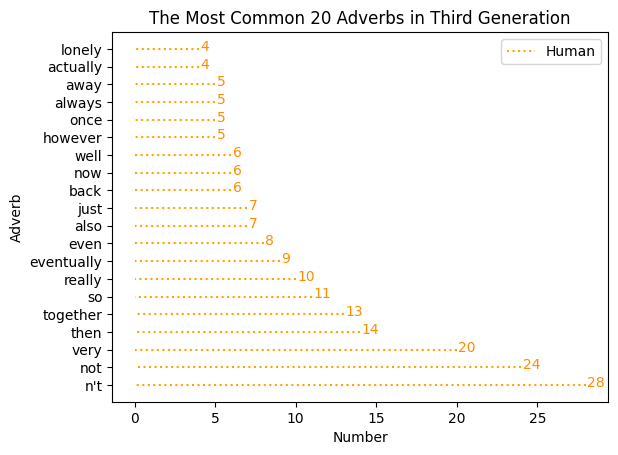

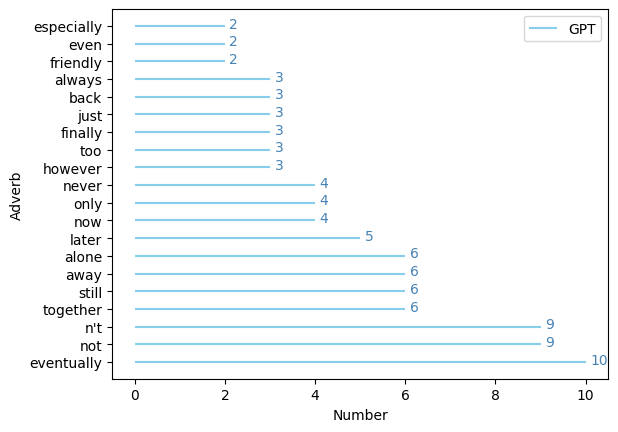

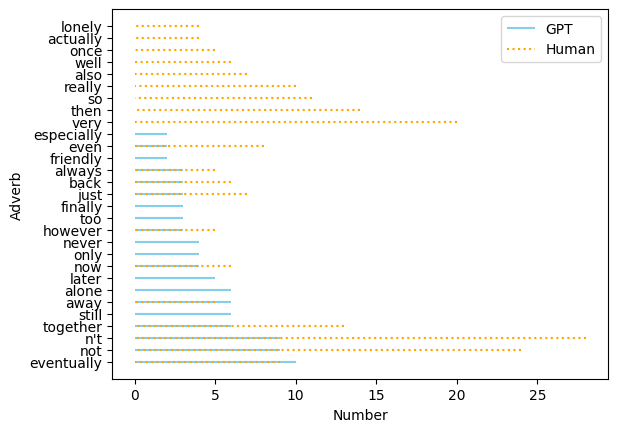

In [54]:
# Get values from GPT and Human lists 
names = [tup[0] for tup in GPT_R3_common_adverbs]
values = [tup[1] for tup in GPT_R3_common_adverbs]


names_r = [tup[0] for tup in Retell_3_common_adverbs]
values_r= [tup[1] for tup in Retell_3_common_adverbs]



# Human Data
plt.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')
plt.title("The Most Common 20 Adverbs in Third Generation", loc='center')

for i, v in enumerate(values_r):
    plt.text(v + 0.1, i - 0.1, str(v), color='darkorange')
 

# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


# GPT Data
plt.hlines(names,values,xmax=0, color='skyblue', label='GPT')

for i, v in enumerate(values):
    plt.text(v + 0.1, i - 0.1, str(v), color='steelblue')

 
 
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


fig, ax = plt.subplots()

# The horizontal plot is made using the hline function
ax.hlines(names,values,xmax=0, color='skyblue', label='GPT')
ax.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')

    
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()

### Overall Top 20 

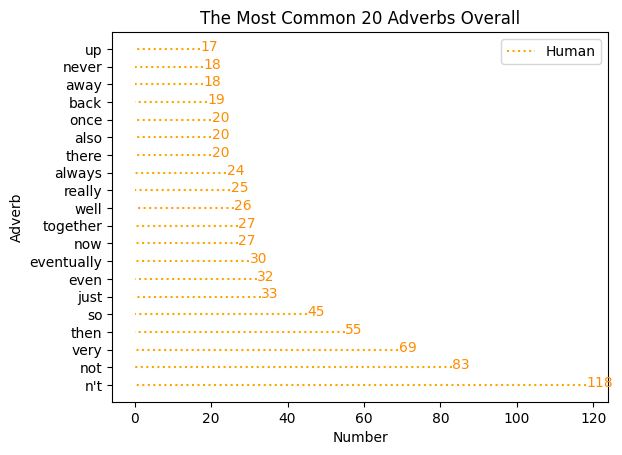

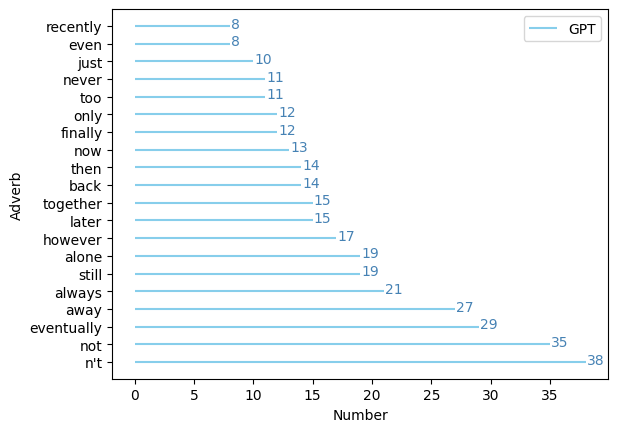

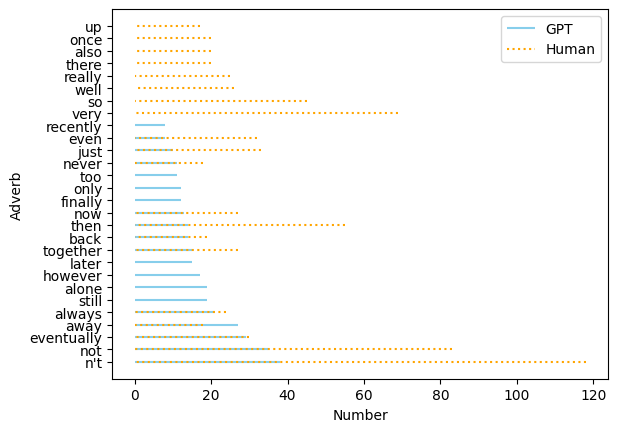

In [187]:
# Get values from GPT and Human lists 
names_r = [tup[0] for tup in all_human_common_adverbs]
values_r = [tup[1] for tup in all_human_common_adverbs]


names = [tup[0] for tup in all_gpt_common_adverbs]
values= [tup[1] for tup in all_gpt_common_adverbs]



# Human Data
plt.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')
plt.title("The Most Common 20 Adverbs Overall", loc='center')

for i, v in enumerate(values_r):
    plt.text(v + 0.1, i - 0.1, str(v), color='darkorange')
 

# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


# GPT Data
plt.hlines(names,values,xmax=0, color='skyblue', label='GPT')

for i, v in enumerate(values):
    plt.text(v + 0.1, i - 0.1, str(v), color='steelblue')

 
 
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()


fig, ax = plt.subplots()

# The horizontal plot is made using the hline function
ax.hlines(names,values,xmax=0, color='skyblue', label='GPT')
ax.hlines(names_r,values_r,xmax=0, color='orange', label = 'Human', linestyles='dotted')

    
# Add titles and axis names
plt.xlabel('Number')
plt.ylabel('Adverb')
plt.legend()
# Show the plot
plt.show()

### 4. Get Unique Differences

In [175]:
def all_unique_adverbs(dataset):
    adverbs = []
    # for 116 stories
    for i in range(len(dataset)):
        # get every token for the length of tokens in story i
        for y in range(len(dataset.iloc[i])):
            # get the second part (pos-tag), if it is adverb:
            if (dataset.iloc[i][y][1]) == ('RB'or 'RBR'or 'WBR'):
                #print('yes',i, df.tokenized_STORY.iloc[i][y])
                adverbs.append(dataset.iloc[i][y][0])
            else:
                pass
    story_adv = dict(Counter(adverbs))
    newdict = {}
    # to get upper and lower words together, make them lower first
    for key, value in story_adv.items():
        key_lower = key.lower()
        if key_lower in newdict:
            newdict[key_lower] += value
        else:
            newdict[key_lower] = value
        #print(sorted_story_adv[:20])
    return(newdict)

In [176]:
#Apply this function to all stories
story_common_adverbs = all_unique_adverbs(df.tokenized_STORY)

Retell_1_common_adverbs = all_unique_adverbs(df.tokenized_Retell_1)
Retell_2_common_adverbs = all_unique_adverbs(df.tokenized_Retell_2)
Retell_3_common_adverbs = all_unique_adverbs(df.tokenized_Retell_3)

GPT_R1_common_adverbs = all_unique_adverbs(df.tokenized_GPT_R1)
GPT_R2_common_adverbs = all_unique_adverbs(df.tokenized_GPT_R2)
GPT_R3_common_adverbs = all_unique_adverbs(df.tokenized_GPT_R3)


In [177]:
# Unique to GPT (Retelling 1)
set(GPT_R1_common_adverbs.keys())-set(Retell_1_common_adverbs.keys())

{'ahead',
 'aimlessly',
 'almost',
 'blindly',
 'closely',
 'constantly',
 'eagerly',
 'especially',
 'first',
 'friendly',
 'happily',
 'ill',
 'initially',
 'kindly',
 'lively',
 'pleasantly',
 'politely',
 'quietly',
 'slowly',
 'soon',
 'successfully'}

### 4.1. Merge All Uniques Into Same List

In [179]:
# Combines keys and values (e.g., 'then, 2,3,4')
def combine_dict(d1, d2,d3):
    return {
        k: tuple(d[k] for d in (d1, d2, d3) if k in d)
        for k in set(d1.keys()) | set(d2.keys() | set(d3.keys()))
    }

human_adv = combine_dict(Retell_1_common_adverbs,Retell_2_common_adverbs,Retell_3_common_adverbs)
gpt_adv = combine_dict(GPT_R1_common_adverbs,GPT_R2_common_adverbs,GPT_R3_common_adverbs)


In [180]:
# Sums values (e.g., 'then, 9')
def sum_dicts(dict_1,dict_2):
    new_dict = {}
    for key, value in dict_1.items():
        if key in dict_2:
            new_dict[key] = value + dict_2[key]
        else:
            new_dict[key] = value
    return new_dict

In [181]:
human_adv_total = sum_dicts(Retell_1_common_adverbs,Retell_2_common_adverbs)
human_adv_total = sum_dicts(human_adv_total,Retell_3_common_adverbs)

In [182]:
gpt_adv_total = sum_dicts(GPT_R1_common_adverbs,GPT_R2_common_adverbs)
gpt_adv_total = sum_dicts(gpt_adv_total,GPT_R3_common_adverbs)

### 4.2. Adverbs Only GPT Used


In [183]:
len(gpt_adv.keys()-human_adv.keys() )

28

In [184]:
gpt_adv.keys()-human_adv.keys()

{'aimlessly',
 'blindly',
 'bravely',
 'closely',
 'contentedly',
 'discover',
 'eagerly',
 'efficiently',
 'especially',
 'first',
 'friendly',
 'happily',
 'ill',
 'kindly',
 'lively',
 'pleasantly',
 'politely',
 'previously',
 'quietly',
 'relaxed',
 'slowly',
 'successfully',
 'taught',
 'teacher',
 'tragically',
 'truly',
 'unexpectedly',
 'unsuccessfully'}

### 4.3. Adverbs Only Human Used


In [185]:
len(human_adv.keys() - gpt_adv.keys())


111

In [186]:
(human_adv.keys() - gpt_adv.keys())

{'-generally',
 'accordingly',
 'afterward',
 'ago',
 'alike',
 'all',
 'anymore',
 'anywhere',
 'ashore',
 'asleep',
 'attack',
 'automatically',
 'badly',
 'barely',
 'because',
 'before',
 'belly',
 'better',
 'bit',
 'brother',
 'chilly',
 'clearly',
 'completely',
 'currently',
 'dark',
 'dearly',
 'deeply',
 'derrick',
 'desperately',
 'directly',
 'down',
 'downstairs',
 'easily',
 'elsewhere',
 'enough',
 'exactly',
 'extremely',
 'far',
 'fast',
 'forever',
 'fortunately',
 'gay',
 'generally',
 'greatly',
 'heavily',
 'here',
 'his/her',
 'htere',
 'immediately',
 'incredibly',
 'inside',
 'intentionally',
 'jennifer',
 'long',
 'longer',
 'luckily',
 'mad',
 'madly',
 'math',
 'maybe',
 'merely',
 'mildly',
 'no',
 'nowhere',
 'okay',
 'opener',
 'originally',
 'otherwise',
 'out',
 'outside',
 'over',
 'overnight',
 'painfully',
 'perfectly',
 'perhaps',
 'polite',
 'poorly',
 'possibly',
 'pretty',
 'probably',
 'professionally',
 'quit',
 'quite',
 'rather',
 'really',
 '

### 5. Sentiment Analysis

In [127]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

human_sentiment_compound=  []
for keys in human_adv.keys():
    fdist1 = (sia.polarity_scores(keys))
    vocab = list(fdist1.values())[-1]
     

In [128]:
human_sentiment_compound=  []
for keys in gpt_adv.keys():
    fdist1 = (sia.polarity_scores(keys))
    vocab = list(fdist1.values())[-1]
